In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
with open('soc-sign-bitcoinotc/out.soc-sign-bitcoinotc') as f:
    f = f.read()

In [ ]:
#print(f)

In [4]:
s = f.split('\n')

In [5]:
s[0]

'% asym signed'

In [6]:
s[1]

'1\t2\t4\t1289241911.72836'

In [ ]:
two_collumns = []
for i in s[1:-1]:
    a = i.split()
    #print(a)
    two_collumns.append(tuple(sorted((int(a[0]), int(a[1])))))

In [8]:
s[-2]

'1082\t8\t2\t1453684323.75728'

In [9]:
len(two_collumns)

35592

In [10]:
two_collumns[-1]

(8, 1082)

In [11]:
unique = set(two_collumns)

In [12]:
len(unique)

21492

In [14]:
data = sorted(unique)

# START


graph

In [16]:
D = nx.DiGraph()
D.add_edges_from(data)

In [17]:
len(D.nodes)

5881

In [18]:
len(D.edges)

21492

In [19]:
len(nx.shortest_path(D,66).keys())

4008

In [20]:
#nx.shortest_path(D,1)

La plus grande composante connexe du graph est :

In [21]:
# Trouver la plus grande composante connexe du graph
largest_cc = max(nx.connected_components(D.to_undirected()), key=len)

make a subgraph

In [22]:
W = D.subgraph(largest_cc)

In [23]:
len(W.nodes())

5875

relable

In [24]:
mapping = dict(zip(W, range(0, len(W.nodes()))))
N = nx.relabel_nodes(W, mapping)  # nodes are integers 0 through 1707-1

In [25]:
sorted(N)[-3:]

[5872, 5873, 5874]

In [26]:
len(N.nodes)

5875

In [27]:
N = N.to_undirected()

make a txt

In [28]:
N.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (1, 3), (1, 4), (1, 56), (1, 5), (1, 6), (1, 7), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 10), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 13), (1, 69), (1, 70), (1, 14), (1, 71), (1, 72), (1, 73), (1, 74), (1, 16), (1, 75), (1, 76), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 89), (1, 90), (1, 91), (1, 92), (1, 35), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (2, 3), (2, 7), (3, 98), (3, 4), (3, 56),

In [29]:
df = pd.DataFrame()
df['node'] = [i[0] for i in list(N.edges)]
df['edge'] = [i[1] for i in list(N.edges)]

In [30]:
df

,node,edge
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
21484,5748,5751
21485,5785,5789
21486,5786,5789
21487,5789,5790


Combien y a-t-il de sommets et d’aretes dans les donnees filtrees ? com- bien dans les donnees originales ?

sommets = nodes

In [31]:
len(df['node'].unique())

2024

aretes = edges

9059

Calculez la densite et le degre moyen du reseau.

For an undirected graph, the density is calculated as 2*m/(n*(n-1)) where m is the number of edges and n is the number of nodes. The average degree is calculated as 2*m/n .

density

In [32]:
n = len(df['node'].unique())
m = df.shape[0]

In [33]:
density = 2*m/(n*(n-1))
density

0.010496386417854749

average_degree

In [34]:
average_degree = 2*m/n
average_degree

21.234189723320156

# 2 Distances

Question 5. Calculez la distance moyenne entre deux sommets du reseau moreno.


La distance moyenne entre deux sommets est :

In [35]:
average_shortest_path_length = nx.average_shortest_path_length(N)
average_shortest_path_length

3.5710878230065415

Calculez le diametre du reseau

In [36]:
diameter = nx.diameter(N)
diameter

9

# 3 Distribution des degres

Question 7. Calculez la distribution des degres du reseau moreno et tracez la avec une echelle lin-lin puis avec une echelle log-log.


In [37]:
degree_sequence = [d for n, d in N.degree()]

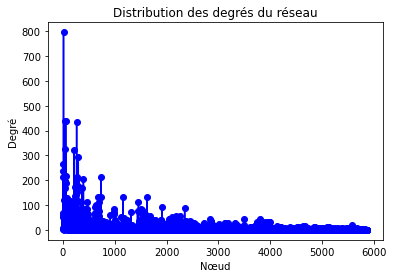

In [38]:
plt.plot(degree_sequence, 'b-', marker='o')
plt.title("Distribution des degrés du réseau")
plt.ylabel("Degré")
plt.xlabel("Nœud")
plt.show()

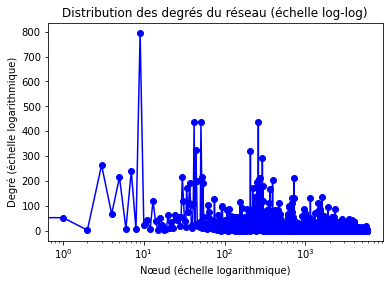

In [39]:
plt.semilogx(degree_sequence, 'b-', marker='o')
plt.title("Distribution des degrés du réseau (échelle log-log)")
plt.ylabel("Degré (échelle logarithmique)")
plt.xlabel("Nœud (échelle logarithmique)")
plt.show()

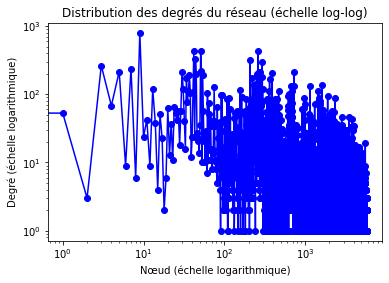

In [40]:
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Distribution des degrés du réseau (échelle log-log)")
plt.ylabel("Degré (échelle logarithmique)")
plt.xlabel("Nœud (échelle logarithmique)")
plt.show()

# 4 Densite locale

Calculez le nombre de triangles, le coefficient de clustering global et le coefficient de clustering local du reseau

In [41]:
# Calcul du nombre de triangles
triangles = sum(nx.triangles(N).values()) / 3
print("Nombre de triangles:", triangles)

# Calcul du coefficient de clustering global
clustering_coeff = nx.transitivity(N)
print("Coefficient de clustering global:", clustering_coeff)

# Calcul du coefficient de clustering local pour chaque noeud
local_clustering = nx.clustering(N)
print("Coefficients de clustering locaux:", local_clustering)

Nombre de triangles: 33493.0
Coefficient de clustering global: 0.0592384412258376
Coefficients de clustering locaux: {0: 0.13804713804713806, 1: 0.11248185776487664, 2: 1.0, 3: 0.050005761032377, 4: 0.10052677787532924, 5: 0.04359921756139969, 6: 0.4722222222222222, 7: 0.027671319573854648, 8: 0.26666666666666666, 9: 0.0034187221773363118, 10: 0.14492753623188406, 11: 0.10220673635307782, 12: 0.19444444444444445, 13: 0.08221288515406162, 14: 0.11806543385490754, 15: 0.16666666666666666, 16: 0.05568627450980392, 17: 0.08695652173913043, 18: 0, 19: 0.06666666666666667, 20: 0.047593865679534636, 21: 0.1282051282051282, 22: 0.2927927927927928, 23: 0.18181818181818182, 24: 0.10480769230769231, 25: 0.19158200290275762, 26: 0.07665505226480836, 27: 0.040726817042606514, 28: 0.16339869281045752, 29: 0.05263157894736842, 30: 0.04478897502153316, 31: 0.09132231404958678, 32: 0.12682926829268293, 33: 0.31666666666666665, 34: 0.07093223254213966, 35: 0.09578947368421052, 36: 0.09156429156429156, 3

Tracez la distribution du coefficient de clustering local de chaque noeud.

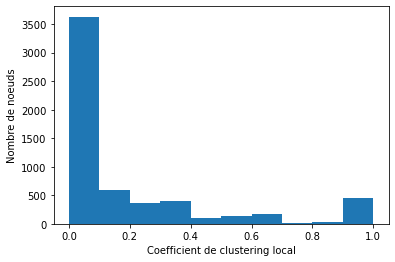

In [42]:
# Tracé de la distribution des coefficients de clustering locaux
plt.hist(local_clustering.values())
plt.xlabel('Coefficient de clustering local')
plt.ylabel('Nombre de noeuds')
plt.show()

Tracez plutot la distribution cumulative inverse

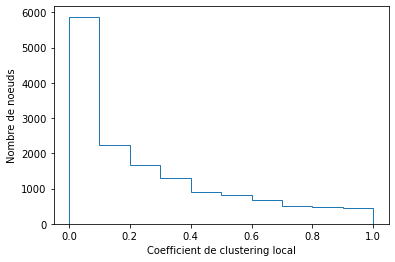

In [43]:
# Tracé de la distribution cumulative inverse des coefficients de clustering locaux
plt.hist(local_clustering.values(), cumulative=-1, histtype='step')
plt.xlabel('Coefficient de clustering local')
plt.ylabel('Nombre de noeuds')
plt.show()

# 5 Comparaison aux modeles classiques

Generez un graphe d’Erdös-Rényi de memes parametres que le reseau

In [46]:
# Récupération du nombre de noeuds et du nombre d'arêtes du graphe
n = D.number_of_nodes()
m = D.number_of_edges()

E = nx.erdos_renyi_graph(n, 0.01)

Suivez la meme methode de traitement des donnees et faites les memes statistiques que pour le reseau original.

In [49]:
def analyse(graph):
    # Trouver la plus grande composante connexe du graph
    largest_cc = max(nx.connected_components(graph.to_undirected()), key=len)
    W = graph.subgraph(largest_cc)
    mapping = dict(zip(W, range(0, len(W.nodes()))))
    N = nx.relabel_nodes(W, mapping)
    N = N.to_undirected()

    print(f'Les donnees filtrees: {len(N.nodes)} sommets, {len(N.edges)} aretes')
    print(f'Les donnees originales: {len(graph.nodes)} sommets, {len(graph.edges)} aretes')
    
    n = len(N.nodes)
    m = len(N.edges)
    density = 2*m/(n*(n-1))
    average_degree = 2*m/n
    print(f'Density: {density}')
    print(f'Average degree: {average_degree}')
    
    print()
    print('** Distribution des degres **')
    degree_sequence = [d for n, d in N.degree()]
    
    plt.plot(degree_sequence, 'b-', marker='o')
    plt.title("Distribution des degrés du réseau")
    plt.ylabel("Degré")
    plt.xlabel("Nœud")
    plt.show()
    
    plt.loglog(degree_sequence, 'b-', marker='o')
    plt.title("Distribution des degrés du réseau (échelle log-log)")
    plt.ylabel("Degré (échelle logarithmique)")
    plt.xlabel("Nœud (échelle logarithmique)")
    plt.show()
    
    print()
    print('** Densite locale **')
    # Calcul du nombre de triangles
    triangles = sum(nx.triangles(N).values()) / 3
    print("Nombre de triangles:", triangles)

    # Calcul du coefficient de clustering global
    clustering_coeff = nx.transitivity(N)
    print("Coefficient de clustering global:", clustering_coeff)

    # Calcul du coefficient de clustering local pour chaque noeud
    local_clustering = nx.clustering(N)
    #print("Coefficients de clustering locaux:", local_clustering)

    # Tracé de la distribution des coefficients de clustering locaux
    plt.hist(local_clustering.values())
    plt.xlabel('Coefficient de clustering local')
    plt.ylabel('Nombre de noeuds')
    plt.show()
    
    # Tracé de la distribution cumulative inverse des coefficients de clustering locaux
    plt.hist(local_clustering.values(), cumulative=-1, histtype='step')
    plt.xlabel('Coefficient de clustering local')
    plt.ylabel('Nombre de noeuds')
    plt.show()
    
    print()
    print('** Distances **')
    average_shortest_path_length = nx.average_shortest_path_length(N)
    print(f'La distance moyenne entre deux sommets est: {average_shortest_path_length}')
    diameter = nx.diameter(N)
    print(f'Le diameter du reseau: {diameter}')

Les donnees filtrees: 5875 sommets, 21489 aretes
Les donnees originales: 5881 sommets, 21492 aretes
Density: 0.0012453871731901854
Average degree: 7.315404255319149

** Distribution des degres **


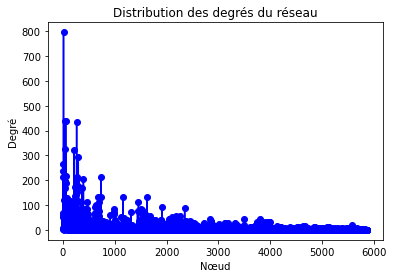

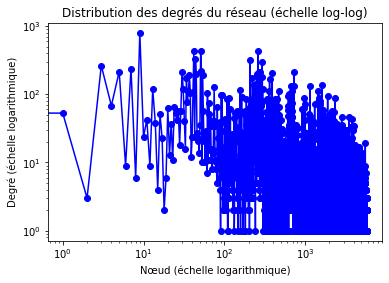


** Densite locale **
Nombre de triangles: 33493.0
Coefficient de clustering global: 0.0592384412258376


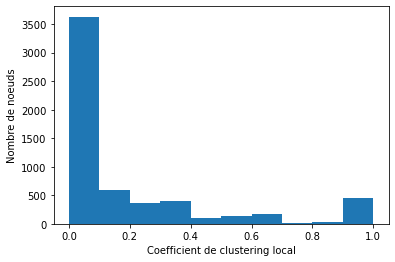

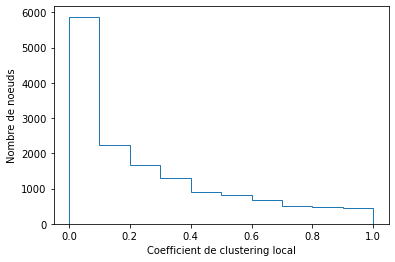


** Distances **
La distance moyenne entre deux sommets est: 3.5710878230065415
Le diameter du reseau: 9


In [50]:
analyse(D)

Les donnees filtrees: 5859 sommets, 17418 aretes
Les donnees originales: 5881 sommets, 17418 aretes
Density: 0.0010149751666728725
Average degree: 5.945724526369688

** Distribution des degres **


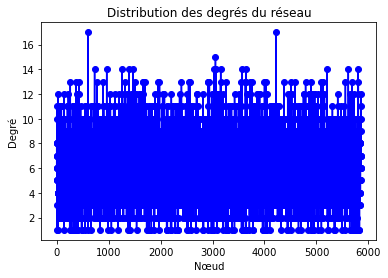

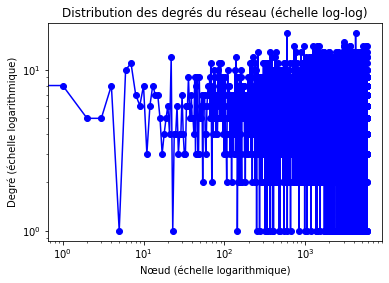


** Densite locale **
Nombre de triangles: 41.0
Coefficient de clustering global: 0.0011912256065081594


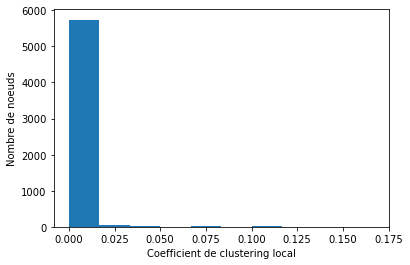

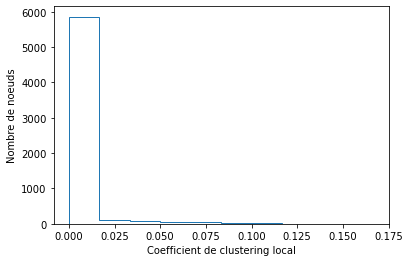


** Distances **
La distance moyenne entre deux sommets est: 5.078876122158537
Le diameter du reseau: 10


In [21]:
analyse(E)

In [46]:
n = D.number_of_nodes()
m = D.number_of_edges()

E = nx.erdos_renyi_graph(n, m)

In [47]:
n, m

(5881, 21492)

Les donnees filtrees: 5881 sommets, 17290140 aretes
Les donnees originales: 5881 sommets, 17290140 aretes
Density: 1.0
Average degree: 5880.0

** Distribution des degres **


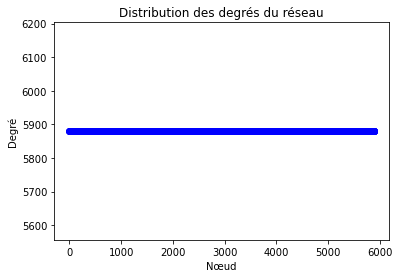

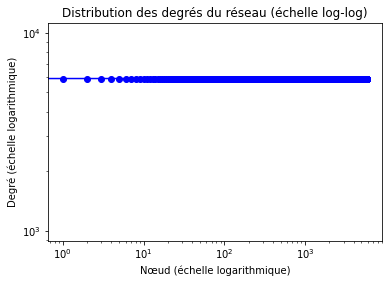


** Densite locale **
Nombre de triangles: 33882911020.0
Coefficient de clustering global: 1.0


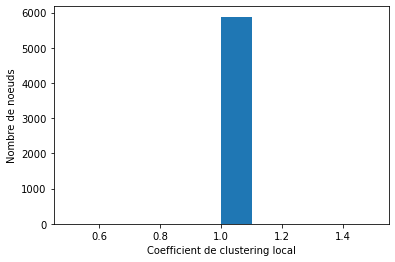

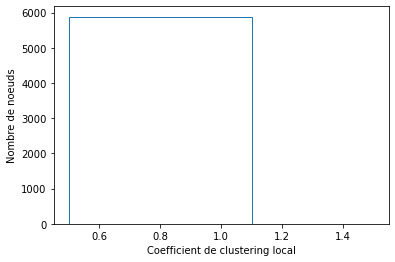


** Distances **
La distance moyenne entre deux sommets est: 1.0
Le diameter du reseau: 1


In [51]:
analyse(E)